In [313]:
import sys
import os
sys.path.append(os.getcwd())
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table

# set up pyspark session

In [314]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

# set up config

In [315]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2025-01-01"

In [316]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01',
 '2025-01-01']

# Build Bronze Table

In [317]:
import importlib
import utils.data_processing_bronze_table
importlib.reload(utils.data_processing_bronze_table)

<module 'utils.data_processing_bronze_table' from '/app/utils/data_processing_bronze_table.py'>

In [318]:
# create bronze datalake
bronze_lms_directory = "datamart/bronze/lms/"

if not os.path.exists(bronze_lms_directory):
    os.makedirs(bronze_lms_directory)

In [319]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table(date_str, bronze_lms_directory, spark)

2023-01-01row count: 530
2023-01-01row count: 530
2023-01-01row count: 530
Saved attributes to: datamart/bronze/lms/bronze_attributes_2023_01_01.csv
Saved financials to: datamart/bronze/lms/bronze_financials_2023_01_01.csv
Saved loan to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv
2023-02-01row count: 501
2023-02-01row count: 501
2023-02-01row count: 1031
Saved attributes to: datamart/bronze/lms/bronze_attributes_2023_02_01.csv
Saved financials to: datamart/bronze/lms/bronze_financials_2023_02_01.csv
Saved loan to: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv
2023-03-01row count: 506
2023-03-01row count: 506
2023-03-01row count: 1537
Saved attributes to: datamart/bronze/lms/bronze_attributes_2023_03_01.csv
Saved financials to: datamart/bronze/lms/bronze_financials_2023_03_01.csv
Saved loan to: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv
2023-04-01row count: 510
2023-04-01row count: 510
2023-04-01row count: 2047
Saved attributes to: datamart/bronze/lms/bronze_a

In [320]:
# inspect output
df_attr, df_fin, df_loan = utils.data_processing_bronze_table.process_bronze_table(
    date_str,
    bronze_lms_directory,
    spark
)
df_attr.toPandas()

2025-01-01row count: 526
2025-01-01row count: 526
2025-01-01row count: 5539
Saved attributes to: datamart/bronze/lms/bronze_attributes_2025_01_01.csv
Saved financials to: datamart/bronze/lms/bronze_financials_2025_01_01.csv
Saved loan to: datamart/bronze/lms/bronze_loan_daily_2025_01_01.csv


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x1009,Arunah,26,063-67-6938,Mechanic,2025-01-01
1,CUS_0x1098,Krudyz,23,466-10-5742,_______,2025-01-01
2,CUS_0x109f,Vellacottj,41,283-32-0255,Teacher,2025-01-01
3,CUS_0x10b6,Gillesw,49,439-76-5364,Journalist,2025-01-01
4,CUS_0x10e2,Sonalio,37,168-78-3262,Media_Manager,2025-01-01
...,...,...,...,...,...,...
521,CUS_0xf15,Frankeld,26,881-11-1453,Developer,2025-01-01
522,CUS_0xf60,Ingrams,17,929-19-3979,Lawyer,2025-01-01
523,CUS_0xf74,Andrew Callusd,19,355-58-6584,Doctor,2025-01-01
524,CUS_0xf95,Alexei Anishchukz,17_,082-42-3634,Entrepreneur,2025-01-01


In [321]:
df_fin.toPandas()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x1009,52312.68_,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,...,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,2025-01-01
1,CUS_0x1098,20652.98_,1468.081667,7,5,21,2,"Auto Loan, and Payday Loan",24,10,...,Standard,1859.53,37.441101,18 Years and 11 Months,NM,33.238356,54.60338563277085,Low_spent_Small_value_payments,348.96642479393626,2025-01-01
2,CUS_0x109f,130435.86000000002,10623.655000,4,846,9,2,"Home Equity Loan, and Home Equity Loan",13,1,...,Good,942.71,34.784704,29 Years and 11 Months,NM,188.186133,1070.730679227028,Low_spent_Medium_value_payments,81.1419359951725,2025-01-01
3,CUS_0x10b6,5691341.0,1712.969167,7,3,19,3,"Payday Loan, Credit-Builder Loan, and Debt Con...",6,12,...,Standard,277.93,40.278541,18 Years and 4 Months,No,37.996378,65.372164147804,High_spent_Small_value_payments,327.9283743913377,2025-01-01
4,CUS_0x10e2,43133.85000000001,3432.487500,10,10,31,7,"Personal Loan, Auto Loan, Not Specified, Home ...",43,24,...,Bad,2504.1,27.115861,10 Years and 9 Months,Yes,151.287255,67.89250966068741,High_spent_Large_value_payments,364.0689853638198,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,CUS_0xf15,45652.17,3888.347500,8,6,13,7,"Mortgage Loan, Payday Loan, Debt Consolidation...",10,10,...,_,28.54,26.846632,10 Years and 11 Months,Yes,160.473304,154.47086437898875,Low_spent_Medium_value_payments,353.8905820472088,2025-01-01
522,CUS_0xf60,34413.76,2916.813333,6,5,8,5,"Home Equity Loan, Home Equity Loan, Home Equit...",23,20,...,_,113.06,24.508003,6 Years and 4 Months,Yes,74.328709,330.7631176311532,Low_spent_Small_value_payments,176.5895062534961,2025-01-01
523,CUS_0xf74,17111.35,1367.645556,10,6,3868,7,"Personal Loan, Mortgage Loan, Home Equity Loan...",55,25,...,Bad,1763.48,25.724679,19 Years and 0 Months,Yes,95.734001,55.60022588346901,Low_spent_Medium_value_payments,264.66063434363843,2025-01-01
524,CUS_0xf95,15604.56,1389.380000,9,5,25,3,"Debt Consolidation Loan, Home Equity Loan, and...",27,23,...,Bad,2686.18,35.184082,19 Years and 10 Months,Yes,37.912350,92.1139885286824,Low_spent_Small_value_payments,298.9116613286117,2025-01-01


In [322]:
df_loan.toPandas()

,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x1009_2025_01_01,CUS_0x1009,2025-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2025-01-01
1,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,10,10000,1000.0,1000.0,0.0,0.0,2025-01-01
2,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,9,10000,1000.0,0.0,7000.0,8000.0,2025-01-01
3,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,3,10000,1000.0,1000.0,0.0,7000.0,2025-01-01
4,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,1,10000,1000.0,1000.0,0.0,9000.0,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...
5534,CUS_0xfe3_2024_04_01,CUS_0xfe3,2024-04-01,10,9,10000,1000.0,1000.0,0.0,1000.0,2025-01-01
5535,CUS_0xff3_2024_06_01,CUS_0xff3,2024-06-01,10,7,10000,1000.0,1000.0,0.0,3000.0,2025-01-01
5536,CUS_0xff4_2024_12_01,CUS_0xff4,2024-12-01,10,1,10000,1000.0,1000.0,0.0,9000.0,2025-01-01
5537,CUS_0xff6_2024_10_01,CUS_0xff6,2024-10-01,10,3,10000,1000.0,1000.0,0.0,7000.0,2025-01-01


# Build Silver Table

In [323]:
# Create silver datalake directories if not exist
silver_loan_daily_directory = "datamart/silver/loan_daily/"
silver_attr_directory = "datamart/silver/attributes/"
silver_fin_directory = "datamart/silver/financials/"

for directory in [silver_loan_daily_directory, silver_attr_directory, silver_fin_directory]:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [324]:
import importlib
import utils.data_processing_silver_table
importlib.reload(utils.data_processing_silver_table)

<module 'utils.data_processing_silver_table' from '/app/utils/data_processing_silver_table.py'>

In [325]:
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table(date_str,bronze_lms_directory,silver_loan_daily_directory,silver_attr_directory,silver_fin_directory,spark)

Loaded loan_daily from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv Row count: 530
Loaded attributes from: datamart/bronze/lms/bronze_attributes_2023_01_01.csv Row count: 530
Loaded financials from: datamart/bronze/lms/bronze_financials_2023_01_01.csv Row count: 530
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet
Saved to: datamart/silver/attributes/silver_attributes_2023_01_01.parquet
Saved to: datamart/silver/financials/silver_financials_2023_01_01.parquet
Loaded loan_daily from: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv Row count: 1031
Loaded attributes from: datamart/bronze/lms/bronze_attributes_2023_02_01.csv Row count: 501
Loaded financials from: datamart/bronze/lms/bronze_financials_2023_02_01.csv Row count: 501
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet
Saved to: datamart/silver/attributes/silver_attributes_2023_02_01.parquet
Saved to: datamart/silver/financials/silver_financials_2023_02_01.parquet
Loa

In [326]:
df_loan, df_attr, df_fin = utils.data_processing_silver_table.process_silver_table(date_str,  bronze_lms_directory,silver_loan_daily_directory,silver_attr_directory,silver_fin_directory,spark)

# transfer to Pandas
loan_pd = df_loan.toPandas()
attr_pd = df_attr.toPandas()
fin_pd = df_fin.toPandas()

print("💰 Loan Table:")
display(loan_pd.head())

print("👤 Attributes Table:")
display(attr_pd.head())

print("📊 Financials Table:")
display(fin_pd.head())


Loaded loan_daily from: datamart/bronze/lms/bronze_loan_daily_2025_01_01.csv Row count: 5539
Loaded attributes from: datamart/bronze/lms/bronze_attributes_2025_01_01.csv Row count: 526
Loaded financials from: datamart/bronze/lms/bronze_financials_2025_01_01.csv Row count: 526
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_01_01.parquet
Saved to: datamart/silver/attributes/silver_attributes_2025_01_01.parquet
Saved to: datamart/silver/financials/silver_financials_2025_01_01.parquet
💰 Loan Table:


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date,mob,installments_missed,first_missed_date,dpd
0,CUS_0x1009_2025_01_01,CUS_0x1009,2025-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2025-01-01,0,0,None,0
1,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,10,10000.0,1000.0,1000.0,0.0,0.0,2025-01-01,10,0,None,0
2,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,9,10000.0,1000.0,0.0,7000.0,8000.0,2025-01-01,9,7,2024-06-01,214
3,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,3,10000.0,1000.0,1000.0,0.0,7000.0,2025-01-01,3,0,None,0
4,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,1,10000.0,1000.0,1000.0,0.0,9000.0,2025-01-01,1,0,None,0


👤 Attributes Table:


,Customer_ID,Name,Age,Occupation,snapshot_date,age_group
0,CUS_0x1009,Arunah,26.0,Mechanic,2025-01-01,26-35
1,CUS_0x1098,Krudyz,23.0,None,2025-01-01,18-25
2,CUS_0x109f,Vellacottj,41.0,Teacher,2025-01-01,36-45
3,CUS_0x10b6,Gillesw,49.0,Journalist,2025-01-01,46+
4,CUS_0x10e2,Sonalio,37.0,Media_Manager,2025-01-01,36-45


📊 Financials Table:


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date,credit_limit_increased,credit_history_months,debt_to_income_ratio
0,CUS_0x1009,NaN,4250.390137,6.0,5.0,0.17,4.0,"Not Specified, Home Equity Loan, Credit-Builde...",5.0,18.0,...,40.286995,Yes,108.366470,58.660191,High_spent_Medium_value_payments,508.012329,2025-01-01,1,372,NaN
1,CUS_0x1098,NaN,1468.079956,7.0,5.0,0.21,2.0,"Auto Loan, and Payday Loan",24.0,10.0,...,37.441101,NM,33.238358,54.603386,Low_spent_Small_value_payments,348.966431,2025-01-01,1,227,NaN
2,CUS_0x109f,1.304359e+05,10623.660156,4.0,NaN,0.09,2.0,"Home Equity Loan, and Home Equity Loan",13.0,1.0,...,34.784702,NM,188.186127,1070.730713,Low_spent_Medium_value_payments,81.141937,2025-01-01,1,359,0.007227
3,CUS_0x10b6,5.691341e+06,1712.969971,7.0,3.0,0.19,3.0,"Payday Loan, Credit-Builder Loan, and Debt Con...",6.0,12.0,...,40.278542,No,37.996380,65.372162,High_spent_Small_value_payments,327.928375,2025-01-01,1,220,0.000049
4,CUS_0x10e2,4.313385e+04,3432.489990,10.0,10.0,0.31,7.0,"Personal Loan, Auto Loan, Not Specified, Home ...",43.0,24.0,...,27.115860,Yes,151.287262,67.892509,High_spent_Large_value_payments,364.069000,2025-01-01,1,129,0.058054


# EDA on credit labels

Goal: Predict whether a customer will default (binary classification, default = 1 or 0)

We define a customer as “defaulted” if the number of days past due (DPD) is equal to or exceeds 30. This threshold is commonly used in financial risk modeling to represent meaningful delinquency, as it indicates a customer is more than one payment cycle behind.

To validate this decision, we performed an exploratory analysis of DPD distribution and default rate over MOB. As shown in the chart below, the cumulative default rate stabilizes after MOB = 6 when DPD ≥ 30 is applied.

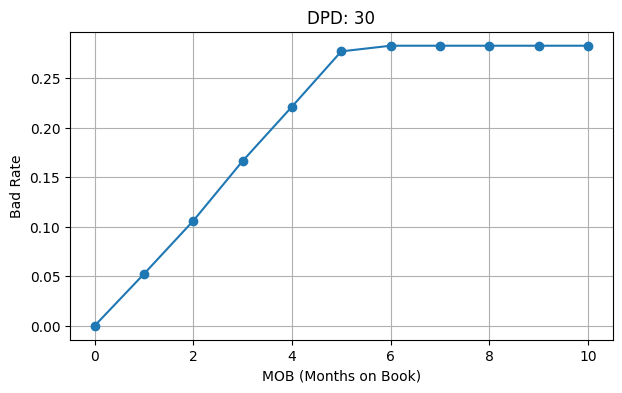

In [327]:
# --- Step 0: Define DPD threshold ---
dpd = 30  # Define threshold for default

# --- Step 1: Set path to Silver loan_daily parquet folder ---
from glob import glob
import os
from datetime import datetime
from pyspark.sql.functions import col

folder_path = "datamart/silver/loan_daily/"  # Replace with your Assignment1 folder if different
files_list = glob(os.path.join(folder_path, "*.parquet"))

# --- Step 2: Load all Silver loan_daily files ---
df = spark.read.option("header", "true").parquet(*files_list)

# --- Step 3: Filter only completed loans (optional: use your own cutoff date) ---
df = df.filter(col("loan_start_date") < datetime.strptime("2024-01-01", "%Y-%m-%d"))

# --- Step 4: Create DPD flag (1 = default, 0 = non-default) ---
df = df.withColumn("dpd_flag", F.when(col("dpd") >= dpd, 1).otherwise(0))

# --- Step 5: Optional: filter only final MOB if you want to compute actual bads ---
# actual_bads_df = df.filter(col("installment_num") == 10)

# --- Step 6: Convert to Pandas for visualization ---
pdf = df.select("mob", "dpd_flag").dropna().toPandas()

# --- Step 7: Group by MOB and calculate bad rate ---
grouped = pdf.groupby("mob")["dpd_flag"].mean().sort_index()

# --- Step 8: Plot ---
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
grouped.plot(kind="line", marker="o")

plt.title(f"DPD: {dpd}")
plt.xlabel("MOB (Months on Book)")
plt.ylabel("Bad Rate")
plt.grid(True)
plt.show()

## 1: Analyze Default Rate by MOB (Months on Book)

In [328]:
from glob import glob

# Folder containing all monthly loan_daily parquet files
silver_loan_folder = "datamart/silver/loan_daily/"
loan_files = glob(silver_loan_folder + "*.parquet")

# Load all parquet files into one DataFrame
df_loan = spark.read.parquet(*loan_files)

# Recreate default column
df_loan = df_loan.withColumn("default", F.when(F.col("dpd") >= 30, 1).otherwise(0))


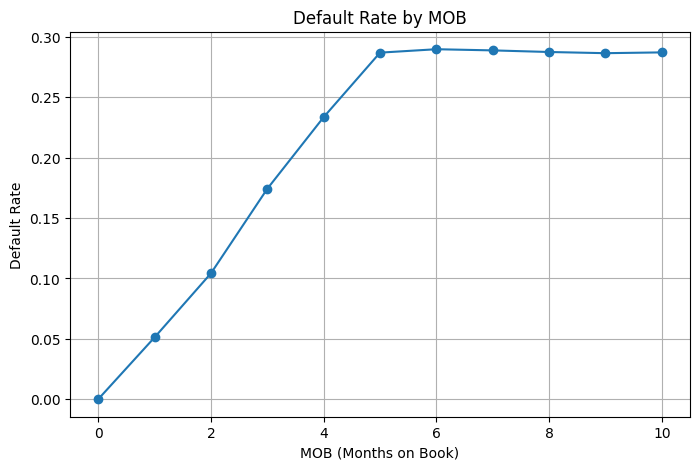

In [329]:
# Group and convert to pandas
df_mob_rate = df_loan.groupBy("mob").agg(F.avg("default").alias("default_rate")).orderBy("mob")
df_mob_rate_pd = df_mob_rate.toPandas()

# Ensure correct data types
df_mob_rate_pd["mob"] = df_mob_rate_pd["mob"].astype(int)
df_mob_rate_pd = df_mob_rate_pd.sort_values("mob")

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(df_mob_rate_pd["mob"], df_mob_rate_pd["default_rate"], marker='o')
plt.xlabel("MOB (Months on Book)")
plt.ylabel("Default Rate")
plt.title("Default Rate by MOB")
plt.grid(True)
plt.show()

As the MOB (Months on Book) increases, the default rate rises sharply in the first few months and then stabilizes around MOB = 6 onwards. This suggests that most defaults occur in the early months of a loan, and MOB could be a strong predictive feature.

## 2: Installments Missed vs Default Rate

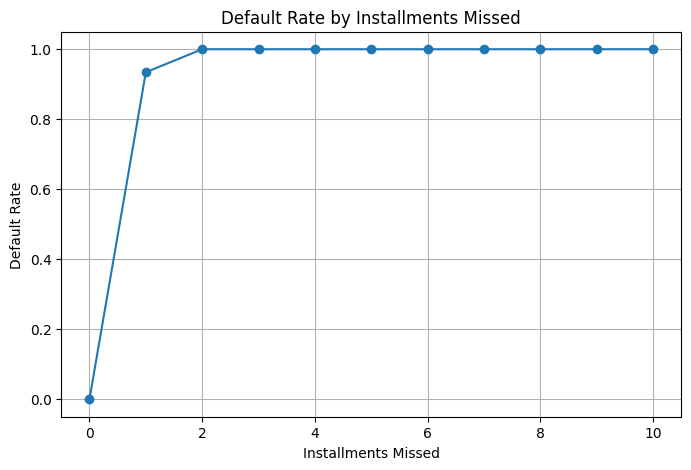

In [330]:
# Group by number of installments missed
df_missed_rate = df_loan.groupBy("installments_missed") \
    .agg(F.avg("default").alias("default_rate")) \
    .orderBy("installments_missed")

# Convert to pandas
df_missed_rate_pd = df_missed_rate.toPandas()
df_missed_rate_pd["installments_missed"] = df_missed_rate_pd["installments_missed"].astype(int)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df_missed_rate_pd["installments_missed"], df_missed_rate_pd["default_rate"], marker='o')
plt.xlabel("Installments Missed")
plt.ylabel("Default Rate")
plt.title("Default Rate by Installments Missed")
plt.grid(True)
plt.show()

## 3.Snapshot Date vs Default Rate 

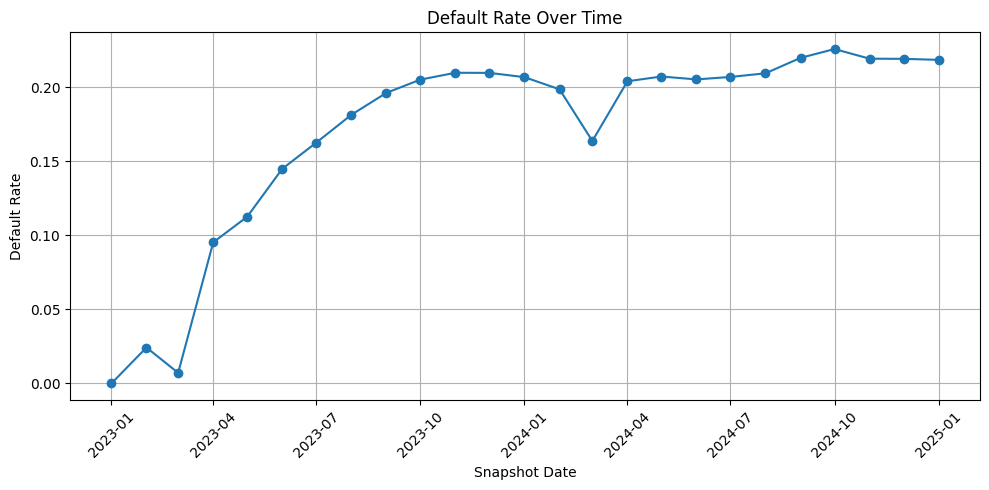

In [331]:
# Group by snapshot_date
df_snapshot_rate = df_loan.groupBy("snapshot_date") \
    .agg(F.avg("default").alias("default_rate")) \
    .orderBy("snapshot_date")

# Convert to pandas
df_snapshot_rate_pd = df_snapshot_rate.toPandas()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_snapshot_rate_pd["snapshot_date"], df_snapshot_rate_pd["default_rate"], marker='o')
plt.xlabel("Snapshot Date")
plt.ylabel("Default Rate")
plt.title("Default Rate Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Temporaraly Join 3 Tables

In [334]:
from glob import glob
import os

# File folders
silver_loan_folder = "datamart/silver/loan_daily/"
silver_attr_folder = "datamart/silver/attributes/"
silver_fin_folder  = "datamart/silver/financials/"

def safe_read_parquets(file_paths):
    dfs = []
    for path in file_paths:
        try:
            df = spark.read.parquet(path)
            dfs.append(df)
        except Exception as e:
            print(f"⚠️ Skipping file due to read error: {path}")
    return dfs

# 1. Load only valid parquet files
loan_files = glob(os.path.join(silver_loan_folder, "*.parquet"))
attr_files = glob(os.path.join(silver_attr_folder, "*.parquet"))
fin_files  = glob(os.path.join(silver_fin_folder,  "*.parquet"))

df_loan_all = safe_read_parquets(loan_files)
df_attr_all = safe_read_parquets(attr_files)
df_fin_all  = safe_read_parquets(fin_files)

# 2. Union all valid snapshots
from functools import reduce
from pyspark.sql import DataFrame

def union_all(dfs):
    return reduce(DataFrame.unionByName, dfs)

df_loan = union_all(df_loan_all)
df_attr = union_all(df_attr_all)
df_fin  = union_all(df_fin_all)

# 3. Add default column to loan
df_loan = df_loan.withColumn("default", F.when(F.col("dpd") >= 30, 1).otherwise(0))

# 4. Join all
df_all_simple = df_loan.join(df_attr.drop("snapshot_date"), on="Customer_ID", how="left") \
                       .join(df_fin.drop("snapshot_date"),  on="Customer_ID", how="left")

# 5. Select EDA columns
eda_cols = [
    "default", "Age", "age_group", "Annual_Income", "Num_Credit_Card",
    "Credit_Utilization_Ratio", "debt_to_income_ratio", "mob"
]
df_all_pd = df_all_simple.select(*eda_cols).dropna(subset=["default"]).toPandas()


## 4.Default Rate by Age Group

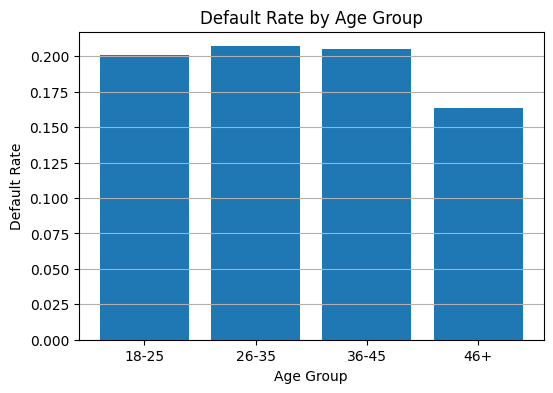

In [335]:
age_group_df = df_all_pd.groupby("age_group")["default"].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(age_group_df["age_group"], age_group_df["default"])
plt.xlabel("Age Group")
plt.ylabel("Default Rate")
plt.title("Default Rate by Age Group")
plt.grid(True, axis='y')
plt.show()

## 5. Annual Income vs Default Rate

/tmp/ipykernel_29/408827437.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_df = df_all_pd.groupby("income_bucket")["default"].mean().reset_index()


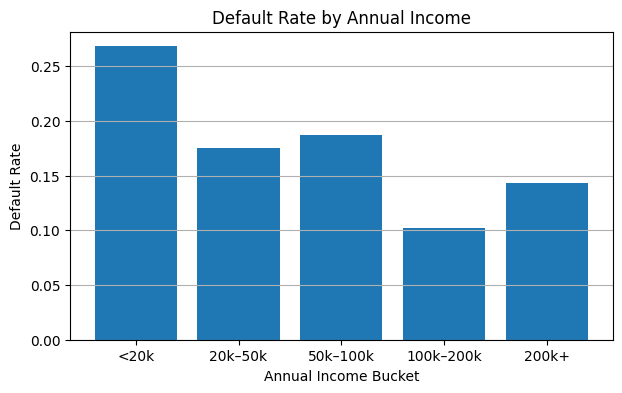

In [336]:
# Create income buckets
bins = [0, 20000, 50000, 100000, 200000, float('inf')]
labels = ["<20k", "20k–50k", "50k–100k", "100k–200k", "200k+"]
df_all_pd["income_bucket"] = pd.cut(df_all_pd["Annual_Income"], bins=bins, labels=labels)

# Group and plot
income_df = df_all_pd.groupby("income_bucket")["default"].mean().reset_index()

plt.figure(figsize=(7, 4))
plt.bar(income_df["income_bucket"], income_df["default"])
plt.xlabel("Annual Income Bucket")
plt.ylabel("Default Rate")
plt.title("Default Rate by Annual Income")
plt.grid(True, axis='y')
plt.show()

## 6.Number of Credit Cards vs Default Rate

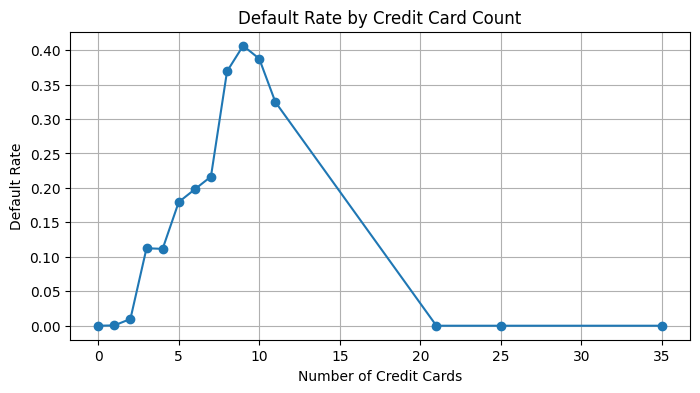

In [337]:
# Group by number of credit cards and calculate default rate
cc_df = df_all_pd.groupby("Num_Credit_Card")["default"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(cc_df["Num_Credit_Card"], cc_df["default"], marker='o')
plt.xlabel("Number of Credit Cards")
plt.ylabel("Default Rate")
plt.title("Default Rate by Credit Card Count")
plt.grid(True)
plt.show()

## 7.Credit Utilization Ratio (Binned) vs Default Rate

/tmp/ipykernel_29/1714893880.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_df = df_all_pd.groupby("credit_util_bucket")["default"].mean().reset_index()


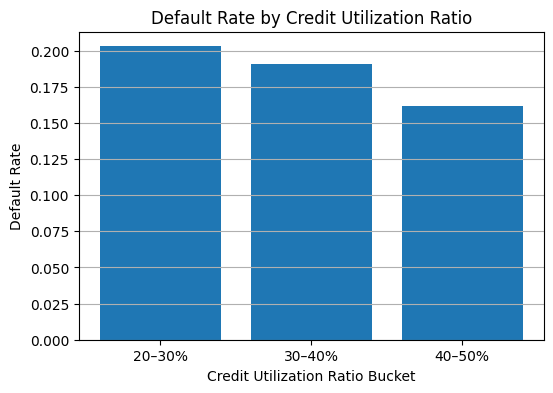

In [338]:
df_all_pd["credit_util_ratio_norm"] = df_all_pd["Credit_Utilization_Ratio"] / 100

# Define bins and labels
df_all_pd["credit_util_bucket"] = pd.cut(df_all_pd["credit_util_ratio_norm"],
                                         bins=[0, 0.2, 0.3, 0.4, 0.5, 0.6],
                                         labels=["0–20%", "20–30%", "30–40%", "40–50%", "50–60%"])

# Group and compute default rate
util_df = df_all_pd.groupby("credit_util_bucket")["default"].mean().reset_index()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(util_df["credit_util_bucket"], util_df["default"])
plt.xlabel("Credit Utilization Ratio Bucket")
plt.ylabel("Default Rate")
plt.title("Default Rate by Credit Utilization Ratio")
plt.grid(True, axis='y')
plt.show()


## 8.Debt-to-Income Ratio (DTI) vs Default Rate

/tmp/ipykernel_29/531717787.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_df = df_all_pd.groupby("dti_bucket")["default"].mean().reset_index()


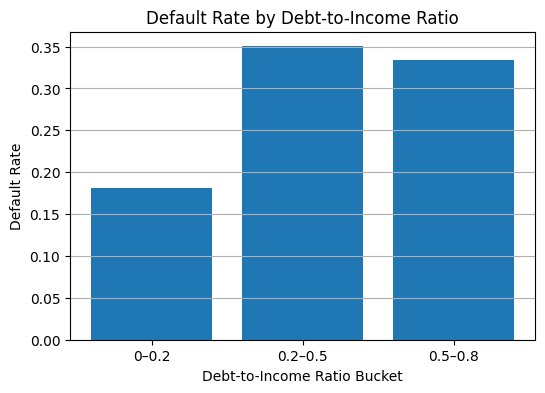

In [339]:
# Create buckets for DTI
df_all_pd["dti_bucket"] = pd.cut(df_all_pd["debt_to_income_ratio"],
                                 bins=[0, 0.2, 0.5, 0.8, 1.5],
                                 labels=["0–0.2", "0.2–0.5", "0.5–0.8", "0.8+"])

# Group by bucket and calculate default rate
dti_df = df_all_pd.groupby("dti_bucket")["default"].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(dti_df["dti_bucket"], dti_df["default"])
plt.xlabel("Debt-to-Income Ratio Bucket")
plt.ylabel("Default Rate")
plt.title("Default Rate by Debt-to-Income Ratio")
plt.grid(True, axis='y')
plt.show()

## 9.Correlation Matrix

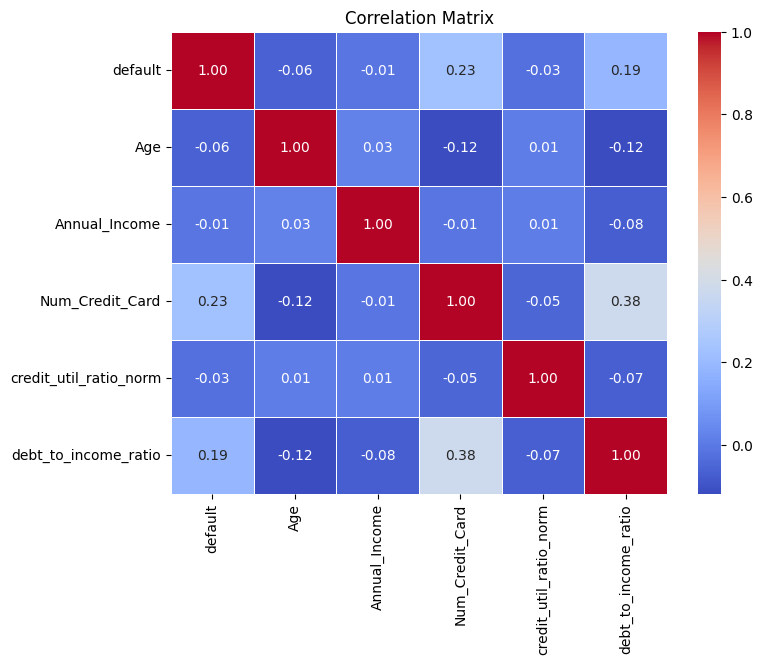

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
corr_cols = ["default", "Age", "Annual_Income", "Num_Credit_Card",
             "credit_util_ratio_norm", "debt_to_income_ratio"]

# Compute correlation matrix
corr_matrix = df_all_pd[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## 10.Mutual Information

/tmp/ipykernel_29/45271688.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=mi_df, palette="Blues_d")


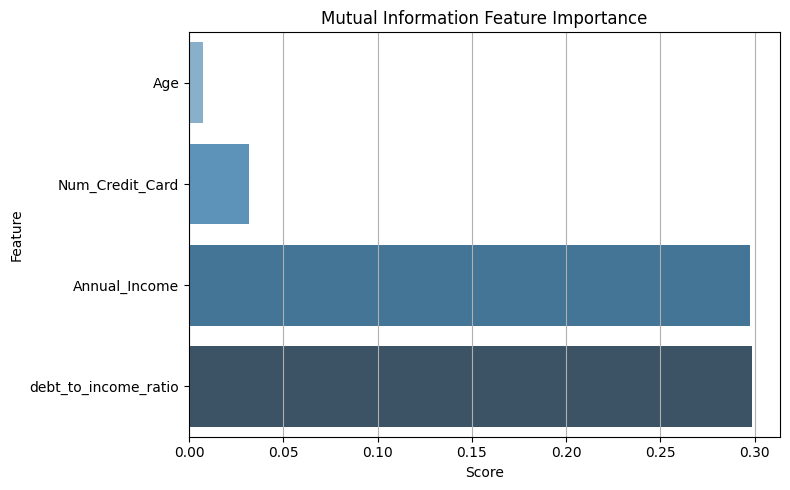

In [415]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features and target
feature_cols = ["Age", "Annual_Income", "Num_Credit_Card", "debt_to_income_ratio"]

X = df_all_pd[feature_cols].dropna()
y = df_all_pd.loc[X.index, "default"]

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute mutual information scores
mi_scores = mutual_info_classif(X_scaled, y, discrete_features=False, random_state=42)

# Step 4: Format results into a DataFrame
mi_df = pd.DataFrame({"Feature": feature_cols, "Importance": mi_scores})
mi_df = mi_df.sort_values("Importance", ascending=True)  # sort for horizontal bar chart

# Step 5: Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=mi_df, palette="Blues_d")
plt.title("Mutual Information Feature Importance")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()


## Build gold table for labels

In [416]:
import importlib
from utils import data_processing_gold_table
importlib.reload(data_processing_gold_table)

<module 'utils.data_processing_gold_table' from '/app/utils/data_processing_gold_table.py'>

In [417]:
# Gold label directory
from utils import data_processing_gold_table
gold_label_store_directory = "datamart/gold/label_store/"
os.makedirs(gold_label_store_directory, exist_ok=True)

In [418]:
for date_str in dates_str_lst:
    data_processing_gold_table.process_gold_table(
        snapshot_date_str=date_str,
        silver_loan_daily_directory=silver_loan_daily_directory,
        silver_attr_directory=silver_attr_directory,
        silver_fin_directory=silver_fin_directory,
        gold_label_store_directory=gold_label_store_directory,
        spark=spark,
        mob=6,
        dpd=30
    )

Loaded loan: 530 attr: 530 fin: 530
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet
Loaded loan: 1031 attr: 501 fin: 501
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_02_01.parquet
Loaded loan: 1537 attr: 506 fin: 506
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_03_01.parquet
Loaded loan: 2047 attr: 510 fin: 510
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_04_01.parquet
Loaded loan: 2568 attr: 521 fin: 521
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_05_01.parquet
Loaded loan: 3085 attr: 517 fin: 517
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_06_01.parquet
Loaded loan: 3556 attr: 471 fin: 471
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_07_01.parquet
Loaded loan: 4037 attr: 481 fin: 481
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_08_01.parquet
Loaded loan: 4491 attr: 454 fin: 454
✅ Saved to: datamart/gold/label_store/gold_label_store_2023_09_01.parquet
Lo

In [419]:
utils.data_processing_gold_table.process_labels_gold_table(
    date_str,
    silver_loan_daily_directory,
    gold_label_store_directory,
    spark,
    dpd=30,
    mob=6
).dtypes

loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_01_01.parquet row count: 5539
saved to: datamart/gold/label_store/gold_label_store_2025_01_01.parquet


[('loan_id', 'string'),
 ('Customer_ID', 'string'),
 ('label', 'int'),
 ('label_def', 'string'),
 ('snapshot_date', 'date')]

## inspect label store

In [420]:
from glob import glob
import os

# Step 1: Get all gold label files
folder_path = gold_label_store_directory
files_list = glob(os.path.join(folder_path, "*.parquet"))

# Step 2: Load and union all
df = spark.read.parquet(*files_list)

# Step 3: Print diagnostics
print("row_count:", df.count())
df.show(5)

row_count: 9479
+--------------------+-----------+-----+----------+-------------+-------------+---------------+------------------------+--------------------+
|             loan_id|Customer_ID|label| label_def|snapshot_date|Annual_Income|Num_Credit_Card|Credit_Utilization_Ratio|debt_to_income_ratio|
+--------------------+-----------+-----+----------+-------------+-------------+---------------+------------------------+--------------------+
|CUS_0x1037_2023_0...| CUS_0x1037|    0|30dpd_6mob|   2023-07-01|         NULL|           NULL|                    NULL|                NULL|
|CUS_0x1069_2023_0...| CUS_0x1069|    0|30dpd_6mob|   2023-07-01|         NULL|           NULL|                    NULL|                NULL|
|CUS_0x114a_2023_0...| CUS_0x114a|    0|30dpd_6mob|   2023-07-01|         NULL|           NULL|                    NULL|                NULL|
|CUS_0x1184_2023_0...| CUS_0x1184|    0|30dpd_6mob|   2023-07-01|         NULL|           NULL|                    NULL|            

In [421]:
df.groupBy("snapshot_date").agg(F.sum(F.col("Annual_Income").isNull().cast("int")).alias("null_count")).show()

+-------------+----------+
|snapshot_date|null_count|
+-------------+----------+
|   2024-08-01|       518|
|   2023-07-01|       530|
|   2023-11-01|       521|
|   2024-09-01|       511|
|   2024-10-01|       513|
|   2023-12-01|       517|
|   2023-09-01|       506|
|   2023-08-01|       501|
|   2023-10-01|       510|
|   2024-12-01|       498|
|   2024-05-01|       491|
|   2024-11-01|       491|
|   2024-04-01|       487|
|   2024-07-01|       485|
|   2024-06-01|       489|
|   2024-02-01|       481|
|   2024-03-01|       454|
|   2024-01-01|       471|
|   2025-01-01|       505|
+-------------+----------+

